In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
import tensorflow as tf

from keras.layers import Dropout, BatchNormalization
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report
import itertools

Using TensorFlow backend.


Part I: Fashion-MNIST Classification

1.Upload Fashion-MNIST dataset and prepare for training (normalize, splitbetween train/test/validation).

---


2.Build a ConvNet with at least 3 convolutional layers.

---


3.Discuss the results and provide the graphs, e.g. train vs validation accuracy andloss over time. Show the confusion matrix.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


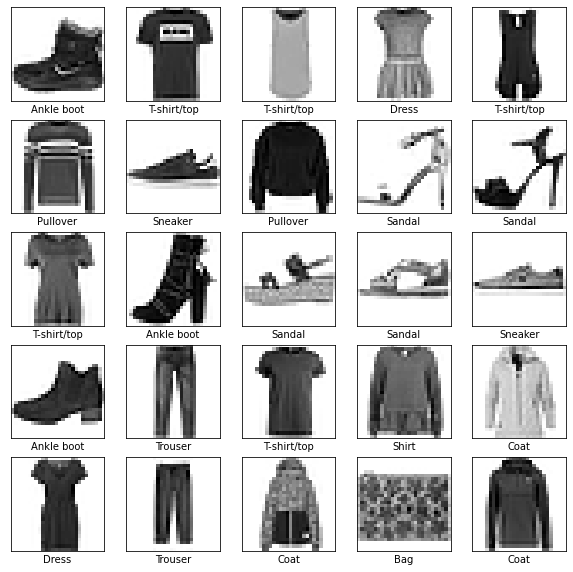

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [6]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [7]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [8]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
train_images=train_images/255.0
test_images=test_images/255.0

In [14]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))

model.add(Conv2D(15, (3, 3), activation='relu'))

model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 15)        4335      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 15)        2040      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 15)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1815)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               181600    
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [16]:
history=model.fit(train_images, train_labels, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 43us/step - loss: 0.5378 - accuracy: 0.8059 - val_loss: 0.3459 - val_accuracy: 0.8707
Epoch 2/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.2995 - accuracy: 0.8901 - val_loss: 0.3299 - val_accuracy: 0.8707
Epoch 3/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.2524 - accuracy: 0.9053 - val_loss: 0.2980 - val_accuracy: 0.8975
Epoch 4/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.2200 - accuracy: 0.9182 - val_loss: 0.2631 - val_accuracy: 0.9015
Epoch 5/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.1934 - accuracy: 0.9270 - val_loss: 0.2640 - val_accuracy: 0.9052
Epoch 6/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.1716 - accuracy: 0.9361 - val_loss: 0.2837 - val_accuracy: 0.9040
Epoch 7/10
54000/54000 [==============================] - 2s 35us/ste

In [17]:
score = model.evaluate(test_images, test_labels, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.35915822132825853
Test accuracy: 0.9042999744415283


In [19]:
model.save('Part_1_Model.h5')

Text(0.5, 0, 'epoch')

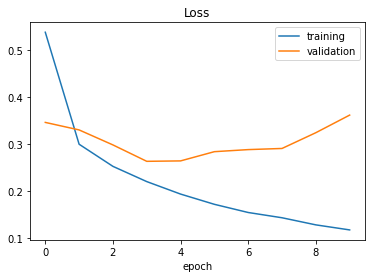

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

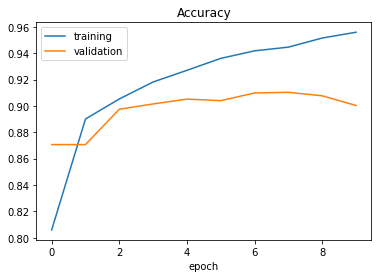

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

Confusion Matrix for Part 1

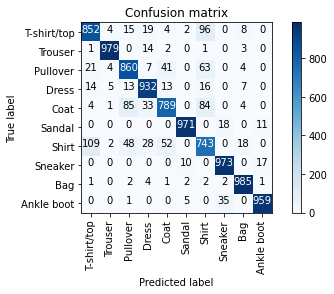

In [23]:
Y_pred = model.predict(test_images)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(test_labels,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx,class_names)

Observation:



---



*   The accuracy for part 1 is around 90% , we have ran it only for 10 epochs and it is considerably good.

* Looking at the graph it is visible that our model is right, its not overfitting or underfitting.

*   In the final epoch we are getting training accuracy of 95% and validation accuracy of 90%, from where we can come to a conclusion that our model isperforming right given the above parameters.






Part II: Data augmentation and CNN improvements 


---
1.Increase the dataset by x4 using any data augmentation techniques (rotations,shifting, mirroring, etc). You can use a combination of these techniquessimultaneously.


---


2.Apply tools that help to prevent overfitting 

---

(regularisers, dropouts, early stopping,etc). Discuss each of them and how they impact the testing performance.


---


3.Discuss the results and provide the graphs, e.g. train 
vs validation accuracy andloss over time. Show the confusion matrix.



In [44]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [45]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [46]:
print(train_images.shape)

(60000, 28, 28)


In [47]:
datagen = ImageDataGenerator( 
        rotation_range = 10, 
        shear_range = 0.1, 
        zoom_range = 0.1 ,
        horizontal_flip=True,
        ) 

In [48]:
aug_train=[]
aug_train_label=[]
for n in range(len(train_images)):
  x = img_to_array(train_images[n])
  x = x.reshape((1, ) + x.shape)  
  i = 0
  for batch in datagen.flow(x, batch_size = 1):
    t=batch.reshape(28,28)
    aug_train.append(t)
    aug_train_label.append(train_labels[n])
    i += 1
    if i > 3: 
        break

In [49]:
aug_train=np.array(aug_train)
aug_train_label=np.array(aug_train_label)

In [50]:
print(aug_train.shape)
print(aug_train_label.shape)

(240000, 28, 28)
(240000,)


In [51]:
xtrain=np.zeros((300000,28,28))
ytrain=np.zeros((300000,))

In [52]:
for i in range(60000):
  xtrain[i]=train_images[i]
  ytrain[i]=train_labels[i]

In [53]:
for i in range(60000,300000):
  xtrain[i]=aug_train[i-60000]
  ytrain[i]=aug_train_label[i-60000]

In [54]:
ytrain=ytrain.astype(int)

In [55]:
xtrain = xtrain.reshape((xtrain.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [56]:
ytrain = to_categorical(ytrain)
test_labels = to_categorical(test_labels)

In [57]:
xtrain=xtrain/255.0
test_images=test_images/255.0

We have augmented the dataset and increased in by 4 times, the bew dataset contains 300,000 entries.

In [58]:
print(xtrain.shape)
print(ytrain.shape)
print(test_images.shape)
print(test_labels.shape)

(300000, 28, 28, 1)
(300000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [59]:
model = Sequential()

model.add(Conv2D(32, (5, 5),strides=(1,1),padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3),strides=(1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(32, (3, 3),strides=(1,1),padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(32, (3, 3),strides=(1,1), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(32, (3, 3),strides=(1,1), activation='relu', kernel_initializer='he_uniform'))

# model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 6, 6, 32)         

In [60]:
history=model.fit(xtrain, ytrain, epochs=200,  validation_split = 0.3, batch_size = 1000, verbose = 1, shuffle = 1)

Train on 210000 samples, validate on 90000 samples
Epoch 1/200
210000/210000 [==============================] - 8s 37us/step - loss: 0.6746 - accuracy: 0.7545 - val_loss: 0.6790 - val_accuracy: 0.7900
Epoch 2/200
210000/210000 [==============================] - 7s 33us/step - loss: 0.4082 - accuracy: 0.8478 - val_loss: 0.4168 - val_accuracy: 0.8457
Epoch 3/200
210000/210000 [==============================] - 7s 34us/step - loss: 0.3579 - accuracy: 0.8668 - val_loss: 0.3561 - val_accuracy: 0.8660
Epoch 4/200
210000/210000 [==============================] - 7s 33us/step - loss: 0.3267 - accuracy: 0.8789 - val_loss: 0.3204 - val_accuracy: 0.8800
Epoch 5/200
210000/210000 [==============================] - 7s 33us/step - loss: 0.3068 - accuracy: 0.8862 - val_loss: 0.3052 - val_accuracy: 0.8862
Epoch 6/200
210000/210000 [==============================] - 7s 33us/step - loss: 0.2895 - accuracy: 0.8923 - val_loss: 0.2955 - val_accuracy: 0.8898
Epoch 7/200
210000/210000 [======================

In [61]:
score = model.evaluate(test_images, test_labels, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3033622504595667
Test accuracy: 0.9218999743461609


In [62]:
model.save('Part_2_Model.h5')

Text(0.5, 0, 'epoch')

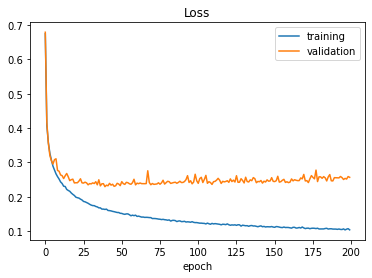

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

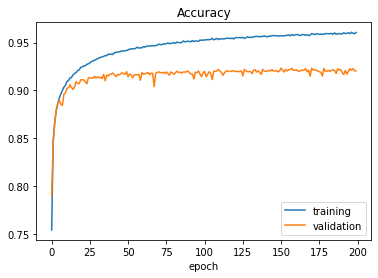

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

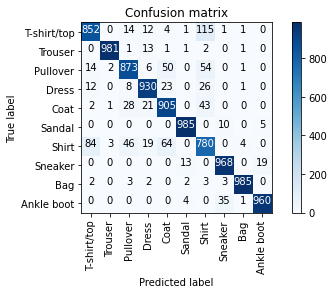

In [65]:
Y_pred = model.predict(test_images)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(test_labels,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx,class_names)

Observations:
*   We have increased the data size by 4 times. I have used the ImageDataGenerator from Keras to generate images. Following augmentations are done to the image- rotation_range,shear_range, zoom_range ,horizontal_flip.

*   After performing the augmentation we are training the model on a dataset of length 300,000.


*   For this part we are getting a accuracy of 92.1 , which is clearly larger then what we got for part 1. This is because Data augmentation improves our model by training it on augmented images.

*   We have used Batch-Normalization, MaxPooling and Dropouts to improve our accuracy.

*   In dropout as we go through the epochs we randomly turn off some nodes, in this case the other nodes have to pick up the slack and take more part in the training. In this way we are training the overall nodes of our network.

*   Batch normalization  is helping us to improving the speed, performance, and stability of our artificial neural network. 

*   Also Max Pooling is helping us extract the  important features and it is also helping us reduce variance and computation complexity.

*   Looking at the graphs we can say that our model is not underfitting or overfitting.
















Sources:
1) https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/



---
2) https://www.tensorflow.org/tutorials/keras/classification


---



3)https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/
